In [1]:
#Importing the libraries required
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [60]:
#import the dataset
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#Checking the overall info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#Checking if there is any null value
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
#EDA
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
#checking for duplicated values
data[data.duplicated()]

,Delivery Time,Sorting Time


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

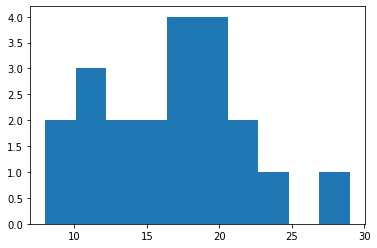

In [7]:
#visualizing the data
plt.hist(data["Delivery Time"])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

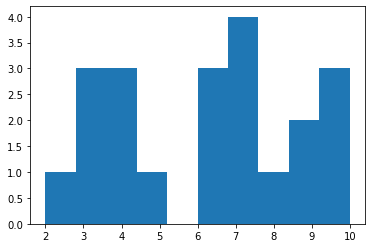

In [8]:
plt.hist(data["Sorting Time"])

Text(0, 0.5, 'Sorting Time')

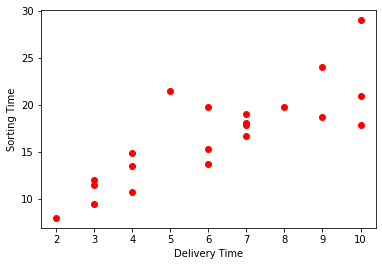

In [9]:
plt.plot(data["Sorting Time"],data["Delivery Time"],"ro")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

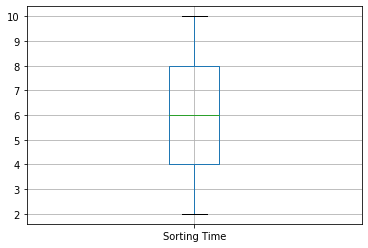

In [10]:
#trying to find outliers
data.boxplot(column=["Sorting Time"])

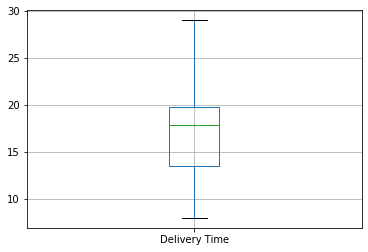

In [11]:
data.boxplot(column=["Delivery Time"])

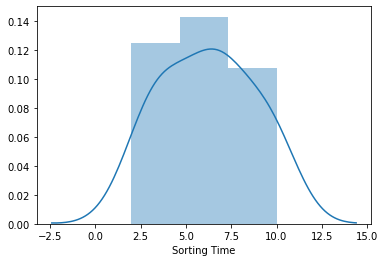

In [12]:
#checking the distribution of the data
sns.distplot(data['Sorting Time'])

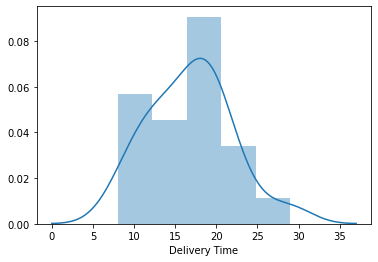

In [13]:
sns.distplot(data['Delivery Time'])

In [14]:
#Finding the correlation of the data
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


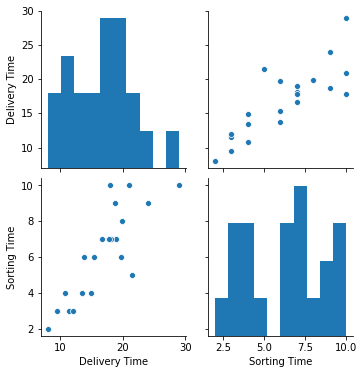

In [15]:
sns.pairplot(data)

In [61]:
#Changing the column name to make the data easier to handle (DT for Delivery time and ST for Sorting Time)
data.rename(columns={'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace=True)
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [63]:
#Building the Simple Linear Regression Model
model = smf.ols("DT~ST", data=data).fit()

In [64]:
#Checking the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        19:02:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Predicting the Delivery Time using the whole Sorting Time column
pred = model.predict(data["ST"])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [20]:
#Checking the residual
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [21]:
#calculating the Root mean square of this model
rmse = np.sqrt(np.mean((np.array(data['ST'])-np.array(pred))**2))
rmse 

10.72205239210456

Text(0, 0.5, 'Delivery Time')

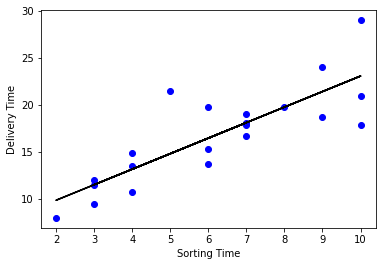

In [22]:
#Visualizing the model and the line
plt.scatter(x=data['ST'],y=data['DT'],color='blue')
plt.plot(data['ST'],pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

Text(0, 0.5, 'Standardized Residual')

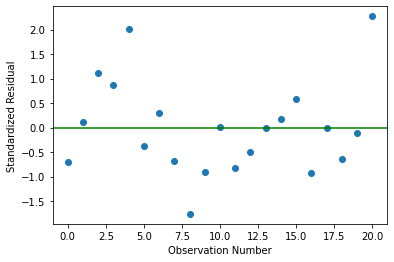

In [23]:
#observing the residual after standardizing it
plt.plot(model.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [24]:
#Observation: r squared = 68% & rmse = 10.722

In [25]:
#Building another model by changing trying to fit the line by transforming the independant variable
#log transformation of independant variable

model_2 = smf.ols("DT~np.log(ST)", data=data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        18:57:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Observation: The rsquared value has improved a bit. 

In [27]:
#Checking the rmse for model_2
rmse_2 = np.sqrt(np.mean((np.array(data['ST'])-np.array(model_2.predict(data["ST"])))**2))
rmse_2

10.749542066249493

Text(0, 0.5, 'Delivery Time')

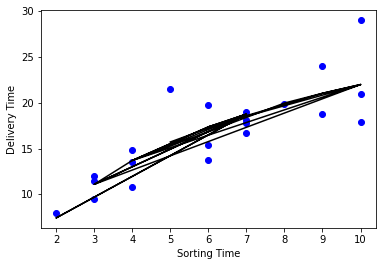

In [28]:
#visualizing the model_2
plt.scatter(x=data['ST'],y=data['DT'],color='blue')
plt.plot(data['ST'],model_2.predict(data["ST"]),color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

Text(0.5, 0, 'Observation Number')

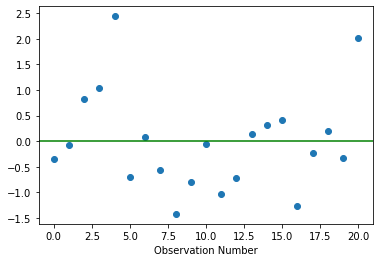

In [29]:
#observing the residual after standardizing it
plt.plot(model_2.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")

In [30]:
#observation: Even though the rsquared increased the rmse went down in model_2

In [31]:
#Building another model by transforming the dependant variable using log to experiment with the best line fit
model_3 = smf.ols("np.log(DT)~ST", data=data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        18:57:26   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#rsquared improved in this model

In [33]:
#converting the predicted dependant variable to exponention to inverse the effect of log
pred_model_3 = np.exp(model_3.predict(data['ST']))
pred_model_3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [34]:
#Checking the RMSE of the model_3
rmse_3 = np.sqrt(np.mean((np.array(data['ST'])-np.array(pred_model_3))**2))
rmse_3

10.574753678890941

Text(0, 0.5, 'Delivery Time')

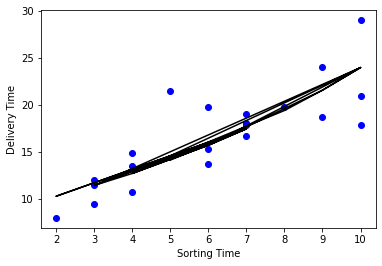

In [35]:
#visualizng the model_3
plt.scatter(x=data['ST'],y=data['DT'],color='blue')
plt.plot(data['ST'],pred_model_3,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

Text(0.5, 0, 'Observation Number')

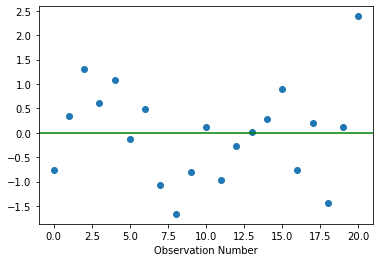

In [36]:
#observing the residual after standardizing it
plt.plot(model_3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")

In [37]:
#Observation: The rsquared and the rmse were better in model_3

In [38]:
#Building another model by transforming the dependant variable to its square root
model_4 = smf.ols("np.sqrt(DT)~ST", data=data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(DT)   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.00e-06
Time:                        18:57:28   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
ST             0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Checking the RMSE
pred_model_4 = model_4.predict(data["ST"]) ** 2 #as we took square root of dependant variable
rmse_4 = np.sqrt(np.mean((np.array(data['ST'])-np.array(pred_model_4))**2))
rmse_4

10.62715460753619

In [40]:
#observation: This model is not better than model_3 as rsquare and rmse is lower and higher respectively

In [41]:
#Building another model by adding another independant variable as the square of the dependant variable
#and transforming dependant variable to log
data["ST_square"] = data.ST ** 2
model_5 = smf.ols('np.log(DT)~ST+ST_square', data=data).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.20e-06
Time:                        18:57:28   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_square     -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Calculating the RMSE
pred_model_5 = np.exp(model_5.predict(data)) #inversing the effect of log
rmse_5 = np.sqrt(np.mean((np.array(data['ST'])-np.array(pred_model_5))**2))
rmse_5

10.549894062750623

In [43]:
#observation this is a good model as the rsquared value increased and rmse decreased

Text(0, 0.5, 'Delivery Time')

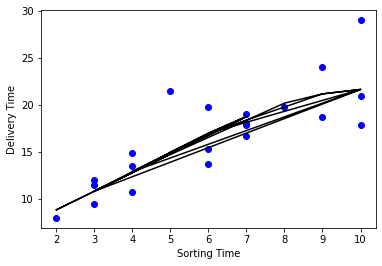

In [44]:
#visualizing this model_5
plt.scatter(x=data['ST'],y=data['DT'],color='blue')
plt.plot(data['ST'],pred_model_5,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

Text(0.5, 0, 'Observation Number')

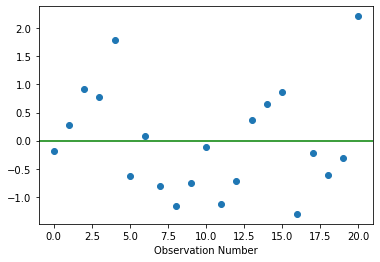

In [45]:
#observing the residual after standardizing it
plt.plot(model_5.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")

In [46]:
#making a dataframe to check which model was best (rsquared should be high and rmse should be low)
model_check = pd.DataFrame({
    "Model": ["model", "model_2", "model_3", "model_4", "model_5"], 
    "R squared": [model.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared, model_5.rsquared],
    "RMSE": [rmse, rmse_2, rmse_3, rmse_4, rmse_5]
})
model_check

,Model,R squared,RMSE
0,model,0.682271,10.722052
1,model_2,0.695443,10.749542
2,model_3,0.710948,10.574754
3,model_4,0.704050,10.627155
4,model_5,0.764867,10.549894


In [47]:
#Observation: model_5 is the best out of the models we made

In [48]:
#dropping the ST_squared column that was made before and adding the prediction of model_5
data = data.drop(['ST_square'],axis=1)
data["Prediction model_5"] = pred_model_5
data

,DT,ST,Prediction model_5
0,21.00,10,21.646921
1,13.50,4,12.909227
2,19.75,6,16.995933
3,24.00,9,21.176938
4,29.00,10,21.646921
5,15.35,6,16.995933
6,19.00,7,18.764526
7,9.50,3,10.825502
8,17.90,10,21.646921
9,18.75,9,21.176938
